## Note

before start doing this project, I try to find the same project to help me preprocess the data from PTB

so I take some project insight from this 
- https://github.com/martiansideofthemoon/ecg-analysis 
- https://github.com/Nospoko/qrs-tutorial. 
- https://github.com/MIT-LCP/wfdb-python

Thank you for helping me by sharing your project

In [1]:
import os
import re

In [ ]:
disease_re = re.compile(
    r'\#\sReason\sfor\sadmission:\s(.*)\s\#\sAcute\sinfarction\s\(localization\):\s(.*)\s\#')

In [ ]:
with open('/Users/adamwidibagaskarta/Downloads/ecg-analysis-master/data/patients.txt', 'r') as f:
    records = f.read()

In [ ]:
records = records.split()
diagnosis = []
positive = []
control = []

In [ ]:
for record in records:
    #print (record)
    filename = os.path.join("/Users/adamwidibagaskarta/Downloads/ecg-analysis-master/data", record + ".hea")
    if not os.path.exists(filename):
        break
    with open(filename, 'r') as f:
        data = f.read()
    result = disease_re.search(data)
    if result is not None:
        disease = result.group(1)[:-1]
        location = result.group(2)[:-1]
        diagnosis.append((disease, location))
        if disease == "Myocardial infarctio" and location == "anterio":
            positive.append(record)
        elif disease == "Healthy contro":
            control.append(record)
    else:
        print ("Error")

In [ ]:
with open("positive.txt", "w") as f:
    f.write("\n".join(positive))
with open("control.txt", "w") as f:
    f.write("\n".join(control))

In [ ]:
if not os.path.exists('positive'):
    os.makedirs('positive')
if not os.path.exists('negative'):
    os.makedirs('negative')

In [ ]:
for p in positive:
    folder = p.split('/')[0]
    os.system('cp -r ' + folder + ' positive/')

for p in control:
    folder = p.split('/')[0]
    os.system('cp -r ' + folder + ' negative/')

In [ ]:
with open('positive.txt', 'r') as f:
    MI = f.read().split()
print(MI)

In [ ]:
with open('control.txt', 'r') as f:
    normal = f.read().split()
print(normal)

In [13]:
disease_CAD = re.compile(r'\#\<age>:\s(.*)\s\<sex>:\s(.*)\s\<diagnoses>\s(.*)\s')

In [3]:
with open('/Users/adamwidibagaskarta/AnacondaProjects/Final Project - Biomedical Programming/patient_CAD.txt', 'r') as f:
    records = f.read()

In [4]:
records = records.split()
diagnosis = []
CAD = []

In [19]:
for record in records:
    filename = os.path.join("/Users/adamwidibagaskarta/AnacondaProjects/Final Project - Biomedical Programming/st/", record + ".hea")
    if not os.path.exists(filename):
        break
    with open(filename, 'r') as f:
        data = f.read()
    result = disease_CAD.search(data)
    if result is not None:
        disease = result.group(3)[:-1]
        if "Coronary artery disease" in disease:
            CAD.append(record)
    else:
        print ("Error")

Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error
Error


In [23]:
CAD[0]

'I01/I01'

In [24]:
if not os.path.exists('CAD'):
    os.makedirs('CAD')

In [27]:
for p in CAD:
    folder = p.split('/')[0]
    os.system('cp -r ' + 'st/' + folder + ' CAD/')

### Read Signal per Wave 

In [46]:
import wfdb
import pywt
from wfdb import processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, dct
from sklearn.decomposition import PCA

In [29]:
record = wfdb.rdrecord("positive/patient002/s0015lre")

In [30]:
chid = 14
data = record.p_signal
channel = data[:, 14]

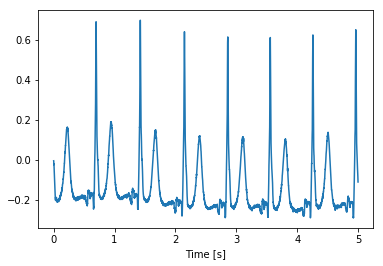

In [31]:
# Plot only the first 2000 samples
howmany = 5000

# Calculate time values in seconds
# times = np.arange(howmany, dtype = 'float') / record.fs
# plt.plot(times, channel[ : howmany])
# plt.xlabel('Time [s]')
# plt.show()

In [32]:
db6 = pywt.Wavelet('db6')

In [33]:
#single level DWT
cA , cD = pywt.dwt(channel,db6)
print(len(cA))
wavel = cA

57605


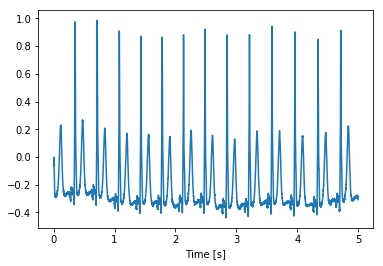

In [34]:
# Calculate time values in seconds
# times = np.arange(howmany, dtype = 'float') / record.fs
# plt.plot(times, wavel[ : howmany])
# plt.xlabel('Time [s]')
# plt.show()

In [35]:
def peaks_hr(sig, peak_inds, fs, title, figsize=(20, 10), saveto=None):
    "Plot a signal with its peaks and heart rate"
    # Calculate heart rate
    hrs = processing.compute_hr(sig_len=sig.shape[0], qrs_inds=peak_inds, fs=fs)
    
    N = sig.shape[0]
    
    fig, ax_left = plt.subplots(figsize=figsize)
    ax_right = ax_left.twinx()
    
    ax_left.plot(sig, color='#3979f0', label='Signal')
    ax_left.plot(peak_inds, sig[peak_inds], 'rx', marker='x', color='#8b0000', label='Peak', markersize=12)
    ax_right.plot(np.arange(N), hrs, label='Heart rate', color='m', linewidth=2)

    ax_left.set_title(title)

    ax_left.set_xlabel('Time (ms)')
    ax_left.set_ylabel('ECG (mV)', color='#3979f0')
    ax_right.set_ylabel('Heart rate (bpm)', color='m')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax_left.tick_params('y', colors='#3979f0')
    ax_right.tick_params('y', colors='m')
    if saveto is not None:
        plt.savefig(saveto, dpi=600)
    plt.show()

In [36]:
# Use the gqrs algorithm to detect qrs locations in the first channel
qrs_inds = processing.gqrs_detect(sig=wavel[ : howmany], fs=record.fs)

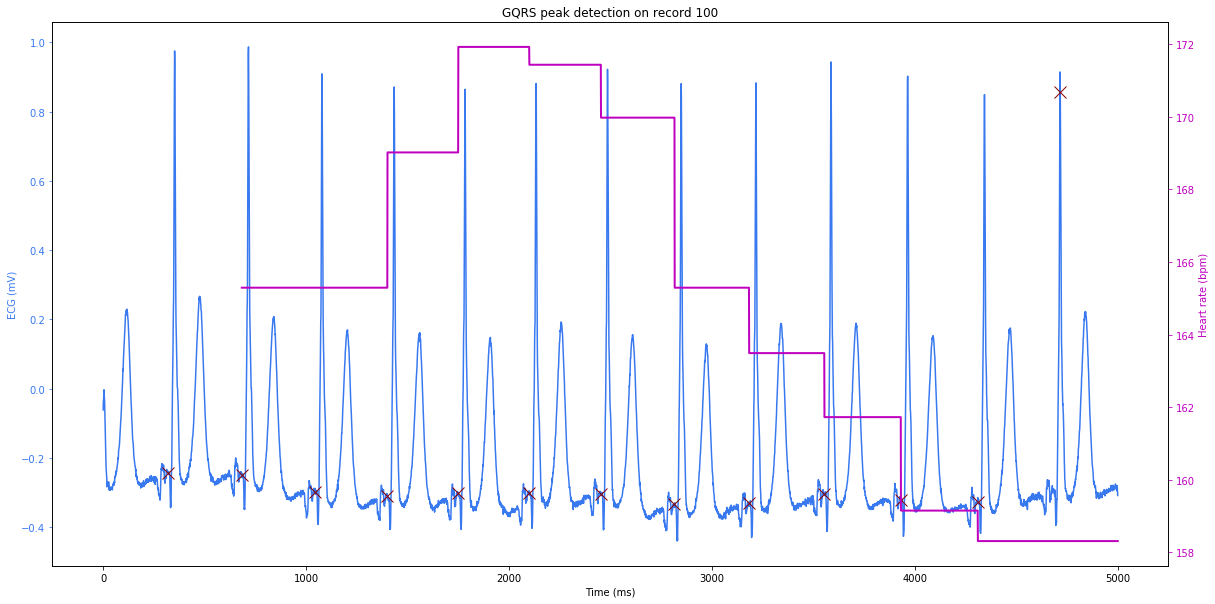

In [37]:
peaks_hr(sig=wavel[ : howmany], peak_inds=qrs_inds, fs=record.fs, title="GQRS peak detection on record 100")

Corrected gqrs detected peak indices: [352, 716, 1078, 1434, 1783, 2133, 2485, 2848, 3216, 3586, 3964, 4342, 4715]


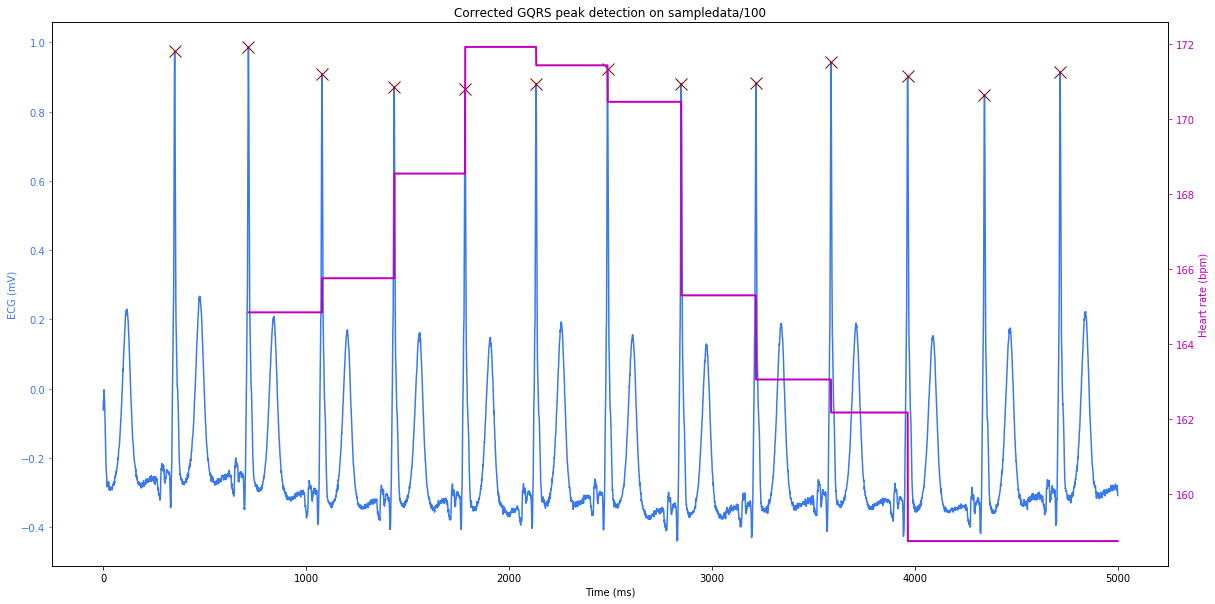

In [38]:
# Correct the peaks shifting them to local maxima
min_bpm = 20
max_bpm = 230

# Use the maximum possible bpm as the search radius
search_radius = int(record.fs * 60 / max_bpm)
corrected_peak_inds = processing.correct_peaks(wavel[ : howmany], peak_inds=qrs_inds,
                                               search_radius=search_radius, smooth_window_size=150)

# Display results
print('Corrected gqrs detected peak indices:', sorted(corrected_peak_inds))
peaks_hr(sig=wavel[ : howmany], peak_inds=sorted(corrected_peak_inds), fs=record.fs,
         title="Corrected GQRS peak detection on sampledata/100")

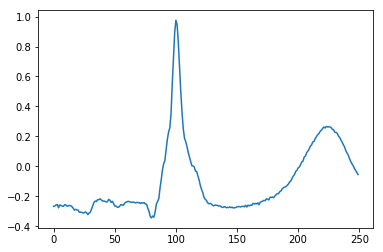

In [39]:
plt.plot(wavel[252:502])
plt.show()

In [68]:
sorterd_peak_MI = sorted(corrected_peak_inds)

In [85]:
MI_beat = []

In [86]:
MI_beat.clear()
for i, peak in enumerate(sorterd_peak_MI,0):
    MI_beat.append(wavel[peak-100:peak+151])

MI_beat = np.array(MI_beat)

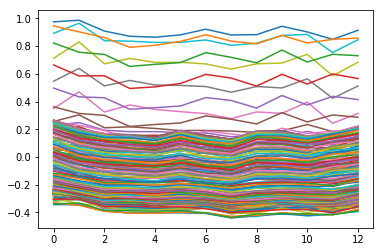

In [87]:
plt.plot(MI_beat)
plt.show()

In [88]:
MI_beat.shape

(13, 251)

In [89]:
dct_signal = dct(MI_beat)

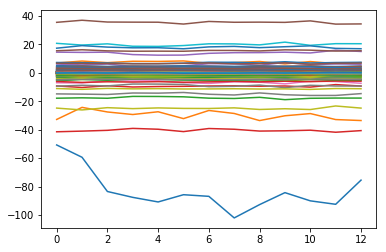

In [90]:
plt.plot(dct_signal)
plt.show()

In [91]:
pca = PCA(n_components=33)

In [67]:
# dct_signal.reshape(-1,1)

In [92]:
pca_signal = pca.fit(dct_signal)

ValueError: n_components=33 must be between 0 and min(n_samples, n_features)=13 with svd_solver='full'

In [44]:
output = ""
for i in range(len(dct_signal)):
    output += str(i / 1000.0) + "," + str(dct_signal[i]) + "\n"
with open("dct_signal.csv", 'w') as f:
    f.write(output)

In [97]:
df = pd.read_csv('/Users/adamwidibagaskarta/AnacondaProjects/FP biomedik/Code & Data/NORMAL.csv')

In [98]:
df.shape

(271, 252)

In [96]:
df.head()

,2,11.34,-1.3605,3.5028,3.4319,0.16625,-0.60772,-0.41201,0.079384,-0.15202,...,0.0077315,0.0042467,-0.010056,-0.0088056,0.0039941,0.0087672,0.0049465,-0.00043319,-0.0065806,-0.0081132
0,2,-5.144400,-4.9024,2.68200,3.52270,1.586900,-1.08310,-1.41990,-0.280030,0.958570,...,1.349300e-04,0.000021,-0.000194,-3.031200e-04,-0.000154,0.000162,0.000304,0.000138,-1.539900e-04,-2.171600e-04
1,2,0.068535,-1.8003,0.91012,-0.12359,-0.381760,-0.32715,0.52824,0.070573,-0.875450,...,-1.110000e-05,0.000032,0.000021,2.140000e-06,-0.000024,0.000002,0.000020,0.000021,-1.530000e-05,-2.260000e-05
2,2,-4.961200,-0.7262,-0.42661,-1.45630,-0.630900,0.64934,0.84383,0.083742,-0.906810,...,7.130000e-05,-0.000172,-0.000156,1.121100e-04,0.000234,0.000019,-0.000236,-0.000162,1.581800e-04,2.655400e-04
3,2,8.157200,1.0278,1.61900,0.42077,-0.841070,-0.49057,0.15919,0.430130,0.364810,...,-1.090000e-05,-0.000003,-0.000007,6.910000e-07,-0.000009,-0.000004,-0.000004,-0.000005,-1.350000e-06,3.120000e-06
4,2,3.287500,1.3763,-0.50867,-0.87277,0.001425,-0.10651,0.05436,0.320640,0.003717,...,-3.870000e-08,0.000005,0.000004,4.440000e-06,0.000001,-0.000002,-0.000003,-0.000002,2.050000e-07,7.240000e-07


In [99]:
dff = pd.read_csv('/Users/adamwidibagaskarta/AnacondaProjects/Final Project - Biomedical Programming/dct_signal_MI.csv')

In [100]:
dff.shape

(28916, 2)

In [101]:
dff.head()

,0.0,[-5.07542350e+01 -3.27935048e+01 1.99353019e+00 -4.14775545e+01
0,1.45549930e+01 3.55440969e+01 -6.97938703e+...,NaN
1,-2.48179906e+01 2.07604934e+01 1.73509493e+...,NaN
2,-1.78538605e+01 -9.22668709e+00 6.16340822e+...,NaN
3,3.02406463e+00 -9.38487805e+00 -1.10417284e+...,NaN
4,7.29438283e+00 3.69596750e+00 -5.56574570e+...,NaN
